#### Setting up the modules

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#### Loading MCU movie info dataset 

In [2]:
mcu_movie_info_df = pd.read_csv("movie_info.csv")

In [3]:
mcu_movie_info_df.head()

,movie_title,release_date,season,phase,production_budget_in_million_(USD),worldwide_collection_in_million_(USD),tomatometer,tomato_audience_score,imdb,metascore,meta_user_score
0,Iron Man,"May 2, 2008",Spring,1,140,585.37,9.4,9.1,7.9,7.9,8.6
1,The Incredible Hulk,"June 13, 2008",Spring,1,150,264.77,6.7,7.0,6.6,6.1,7.0
2,Iron Man 2,"May 7, 2010",Spring,1,200,623.93,7.2,7.1,6.9,5.7,6.4
3,Thor,"May 6, 2011",Spring,1,150,449.33,7.7,7.6,7.0,5.7,7.1
4,Captain America: The First Avenger,"July 22, 2011",Summer,1,140,370.57,7.9,7.5,6.9,6.6,6.8


### Which is the most expensive movie in the MCU? 

In [4]:
mcu_movie_info_df.sort_values(by="production_budget_in_million_(USD)", ascending=False).head(1)

,movie_title,release_date,season,phase,production_budget_in_million_(USD),worldwide_collection_in_million_(USD),tomatometer,tomato_audience_score,imdb,metascore,meta_user_score
21,Avengers: Endgame,"April 26, 2019",Spring,3,356,2797.5,9.4,9.0,8.4,7.8,7.9


### Avengers: Endgame is the most expensive movie in the MCU, with a total production budget of $356 million.

### What is the average budget per movie?

In [5]:
round(np.mean(mcu_movie_info_df["production_budget_in_million_(USD)"]),2)

191.59

### The MCU has spent an average of $191.59 million per movie.

### Which movie was the highest rated and lowest rated by the audience?

In [6]:
# making an average rating column for all movies

average_ratings = []

for i in range(len(mcu_movie_info_df)):
    rat_list = []
    rat_list.append(mcu_movie_info_df["tomatometer"][i])
    rat_list.append(mcu_movie_info_df["tomato_audience_score"][i])
    rat_list.append(mcu_movie_info_df["imdb"][i])
    rat_list.append(mcu_movie_info_df["metascore"][i])
    rat_list.append(mcu_movie_info_df["meta_user_score"][i])
    
    average_ratings.append(round(np.mean(rat_list),1))

mcu_movie_info_df["average_ratings"] = average_ratings

mcu_movie_info_df.head()

,movie_title,release_date,season,phase,production_budget_in_million_(USD),worldwide_collection_in_million_(USD),tomatometer,tomato_audience_score,imdb,metascore,meta_user_score,average_ratings
0,Iron Man,"May 2, 2008",Spring,1,140,585.37,9.4,9.1,7.9,7.9,8.6,8.6
1,The Incredible Hulk,"June 13, 2008",Spring,1,150,264.77,6.7,7.0,6.6,6.1,7.0,6.7
2,Iron Man 2,"May 7, 2010",Spring,1,200,623.93,7.2,7.1,6.9,5.7,6.4,6.7
3,Thor,"May 6, 2011",Spring,1,150,449.33,7.7,7.6,7.0,5.7,7.1,7.0
4,Captain America: The First Avenger,"July 22, 2011",Summer,1,140,370.57,7.9,7.5,6.9,6.6,6.8,7.1


In [7]:
mcu_movie_info_df.sort_values(by="average_ratings",ascending=False).head()

,movie_title,release_date,season,phase,production_budget_in_million_(USD),worldwide_collection_in_million_(USD),tomatometer,tomato_audience_score,imdb,metascore,meta_user_score,average_ratings
0,Iron Man,"May 2, 2008",Spring,1,140,585.37,9.4,9.1,7.9,7.9,8.6,8.6
26,Spider-Man: No Way Home,"December 17, 2021",Fall,4,200,1892.62,9.3,9.8,8.4,7.1,8.6,8.6
21,Avengers: Endgame,"April 26, 2019",Spring,3,356,2797.50,9.4,9.0,8.4,7.8,7.9,8.5
9,Guardians of the Galaxy,"August 1, 2014",Summer,2,170,773.35,9.2,9.2,8.0,7.6,8.2,8.4
8,Captain America: The Winter Soldier,"April 4, 2014",Spring,2,170,714.42,9.0,9.2,7.8,7.0,8.3,8.3


### Iron Man (2008) and Spider Man: No Way (2021) Home are the highest rated movies with an 8.6 average rating.

In [8]:
mcu_movie_info_df.sort_values(by="average_ratings").head()

,movie_title,release_date,season,phase,production_budget_in_million_(USD),worldwide_collection_in_million_(USD),tomatometer,tomato_audience_score,imdb,metascore,meta_user_score,average_ratings
20,Captain Marvel,"March 8, 2019",Winter,3,160,1128.46,7.9,4.5,6.8,6.4,3.0,5.7
25,Eternals,"November 5, 2021",Fall,4,200,402.06,4.7,7.8,6.4,5.2,6.3,6.1
1,The Incredible Hulk,"June 13, 2008",Spring,1,150,264.77,6.7,7.0,6.6,6.1,7.0,6.7
2,Iron Man 2,"May 7, 2010",Spring,1,200,623.93,7.2,7.1,6.9,5.7,6.4,6.7
7,Thor: The Dark World,"November 8, 2013",Fall,2,170,644.78,6.6,7.5,6.8,5.4,7.1,6.7


### Captain Marvel (2019) is the lowest rated movie, with a 5.7 average rating.

In [9]:
round(np.mean(mcu_movie_info_df["average_ratings"]),1)

7.6

### 7.6 is the average rating Marvel receives per movie.

### Exploring the movies worldwide collection.

In [10]:
mcu_movie_info_df.sort_values(by="worldwide_collection_in_million_(USD)",ascending=False).head()

,movie_title,release_date,season,phase,production_budget_in_million_(USD),worldwide_collection_in_million_(USD),tomatometer,tomato_audience_score,imdb,metascore,meta_user_score,average_ratings
21,Avengers: Endgame,"April 26, 2019",Spring,3,356,2797.50,9.4,9.0,8.4,7.8,7.9,8.5
18,Avengers: Infinity War,"April 27, 2018",Spring,3,325,2048.36,8.5,9.1,8.4,6.8,8.6,8.3
26,Spider-Man: No Way Home,"December 17, 2021",Fall,4,200,1892.62,9.3,9.8,8.4,7.1,8.6,8.6
5,The Avengers,"May 4, 2012",Spring,1,220,1518.82,9.1,9.1,8.0,6.9,8.0,8.2
10,Avengers: Age of Ultron,"May 1, 2015",Spring,2,250,1402.81,7.6,8.3,7.3,6.6,7.1,7.4


### With a total worldwide collection of $2797.50 million, Avengers: Endgame is the highest grossing film in the MCU.

In [11]:
mcu_movie_info_df.sort_values(by="worldwide_collection_in_million_(USD)").head()

,movie_title,release_date,season,phase,production_budget_in_million_(USD),worldwide_collection_in_million_(USD),tomatometer,tomato_audience_score,imdb,metascore,meta_user_score,average_ratings
1,The Incredible Hulk,"June 13, 2008",Spring,1,150,264.77,6.7,7.0,6.6,6.1,7.0,6.7
4,Captain America: The First Avenger,"July 22, 2011",Summer,1,140,370.57,7.9,7.5,6.9,6.6,6.8,7.1
23,Black Widow,"July 9, 2021",Summer,4,200,379.75,7.9,9.1,6.7,6.7,6.1,7.3
25,Eternals,"November 5, 2021",Fall,4,200,402.06,4.7,7.8,6.4,5.2,6.3,6.1
24,Shang-Chi and the Legend of the Ten Rings,"September 3, 2021",Summer,4,150,432.24,9.1,9.8,7.4,7.1,7.1,8.1


### With a total worldwide collection of $264.77 million, The Incredible Hulk is the lowest grossing film in the MCU.

### All earnings of the movies.

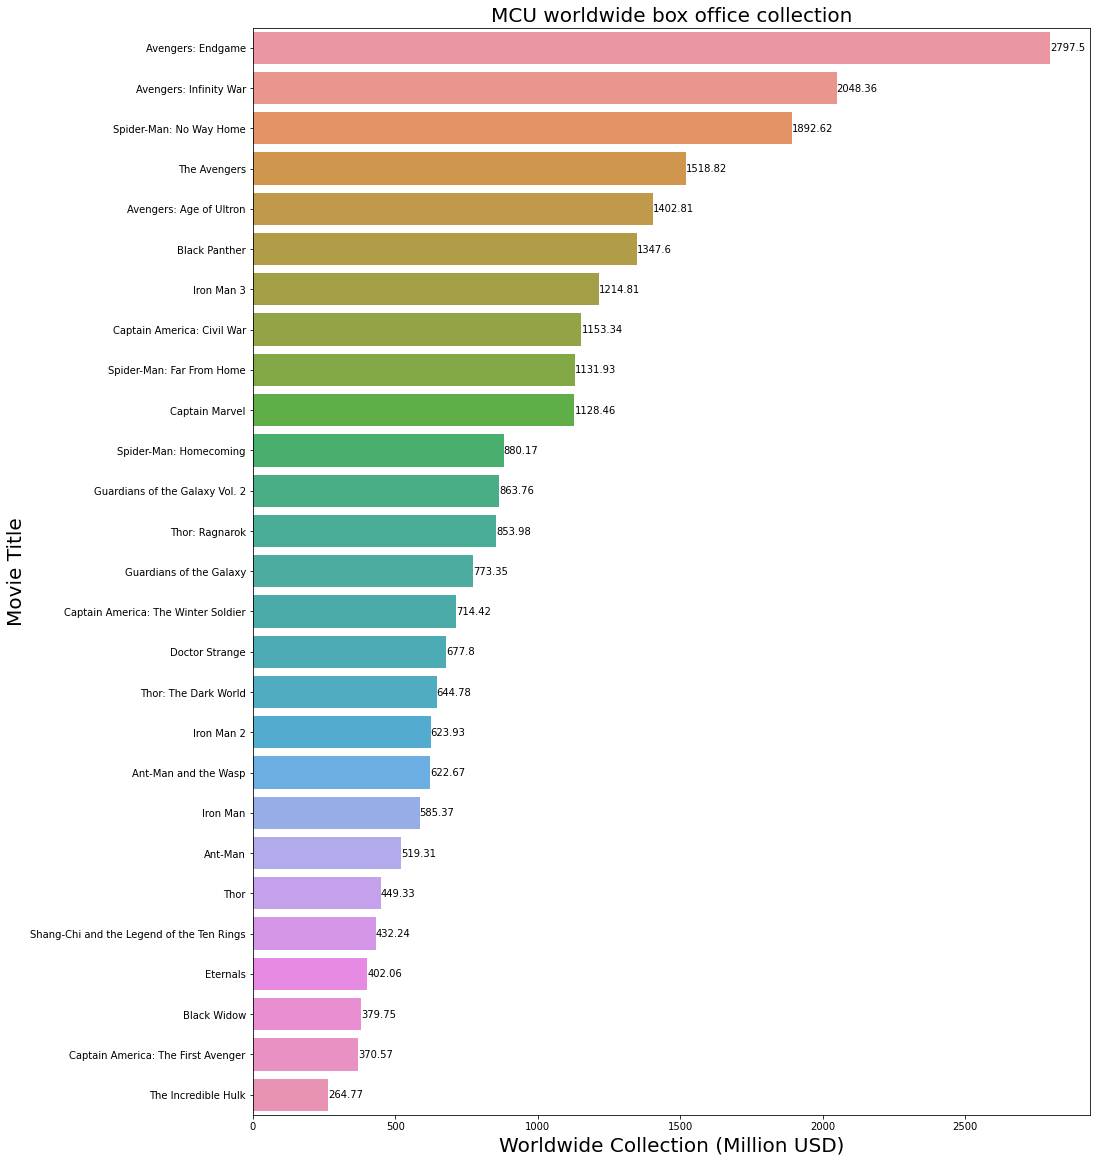

In [12]:
earnings_df = {"movie_title" : mcu_movie_info_df["movie_title"], "worldwide_collection" : mcu_movie_info_df["worldwide_collection_in_million_(USD)"]}

sorted_earnings_df = pd.DataFrame(data=earnings_df) 
sorted_earnings_df = sorted_earnings_df.sort_values(by="worldwide_collection", ascending=False)
plt.figure(figsize = (15,20))

graph_1 = sns.barplot(data=sorted_earnings_df, x="worldwide_collection", y="movie_title",orient="h")    
graph_1.set_xlabel("Worldwide Collection (Million USD)", fontsize = 20)
graph_1.set_ylabel("Movie Title", fontsize = 20)
graph_1.set_title("MCU worldwide box office collection", fontsize = 20)

graph_1.bar_label(graph_1.containers[0])
plt.show() 

In [13]:
round(np.mean(mcu_movie_info_df["worldwide_collection_in_million_(USD)"]),2)

951.65

### Marvel has earned an average of $951.65 million per movie. 

### Conducting a Pearson correlation test between budget and box office collection. Is there any correlation?

In [14]:
r_value, p_value = pearsonr(mcu_movie_info_df["production_budget_in_million_(USD)"], mcu_movie_info_df["worldwide_collection_in_million_(USD)"])

In [15]:
r_value = round(r_value,4)
r_value

0.8286

Text(0.5, 1.05, 'Pearson correlation (r) = 0.8286')

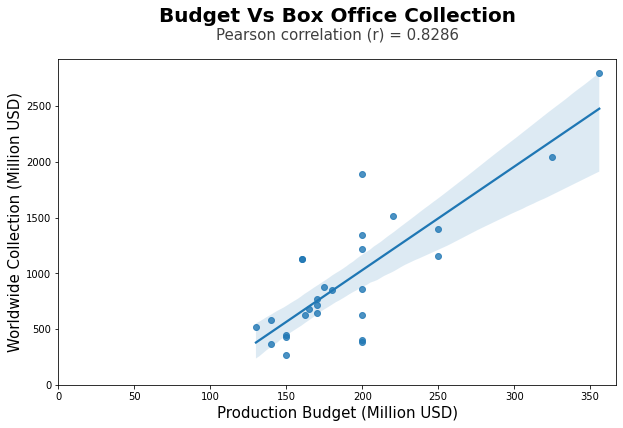

In [16]:
fig, graph_2 = plt.subplots(figsize=(10,6))

sns.regplot(data=mcu_movie_info_df, x="production_budget_in_million_(USD)", y="worldwide_collection_in_million_(USD)")

graph_2.set_xlim(0,)
graph_2.set_ylim(0,)

graph_2.set_xlabel("Production Budget (Million USD)", fontsize = 15)
graph_2.set_ylabel("Worldwide Collection (Million USD)", fontsize = 15)

graph_2.text(x=0.5, y=1.1, s="Budget Vs Box Office Collection", fontsize=20, weight='bold', ha='center', va='bottom', transform=graph_2.transAxes)
graph_2.text(x=0.5, y=1.05, s= f'Pearson correlation (r) = {r_value}', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=graph_2.transAxes)

### According to the graph, there is a strong positive correlation between budget and box office collection. When Marvel has spent more money on production, the results have been positive in box office collections. Each Marvel film covers up their production budget and has always brought some massive profits along with it.

In [17]:
total_spent = sum(np.array(mcu_movie_info_df["production_budget_in_million_(USD)"]))
total_spent

5173

In [18]:
total_earned = round(sum(np.array(mcu_movie_info_df["worldwide_collection_in_million_(USD)"])))
total_earned

25695

In [19]:
diff = total_earned - total_spent
profits = round((diff/total_spent)*100,2)
print(f"{profits} %")

396.71 %


### So Marvel has spent a total of $5173 million on the film's production

### and earned approximately $25695 million from it. That's a 396.71% profit.

### Which season does Marvel prefer to launch a movie?

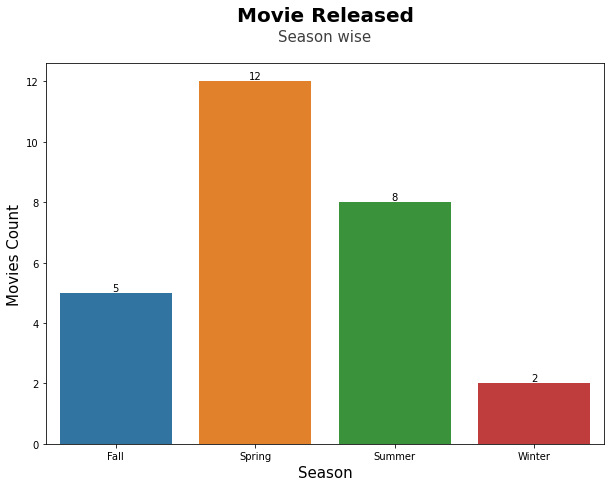

In [20]:
df = mcu_movie_info_df.groupby(["season"]).count()

plt.subplots(figsize=(10,7))
graph_3 = sns.barplot(data=df, x = df.index, y = 'movie_title')

graph_3.set_xlabel("Season", fontsize = 15)
graph_3.set_ylabel("Movies Count", fontsize = 15)

graph_3.text(x=0.5, y=1.1, s="Movie Released", fontsize=20, weight='bold', ha='center', va='bottom', transform=graph_3.transAxes)
graph_3.text(x=0.5, y=1.05, s="Season wise", fontsize=15, alpha=0.75, ha='center', va='bottom', transform=graph_3.transAxes)

graph_3.bar_label(graph_3.containers[0])
plt.show()   

### 12 titles were released in spring, while 8 titles were released in summer, followed by 5 titles in fall and 2 in winter.

### Let's explore the box office collections in various regions.

In [21]:
''' This function will give sorted box office collection of every country with respect to their total collection of every movie
that was released in the country as we pass the regional dataframe as an argument.'''

def sorted_box_office_df(dataframe):
    # listing column names as we don't know how columns can a dataset have
    column_names = list(dataframe.columns)
    
    # Replacing NaN value with zero
    dataframe.fillna(0,inplace=True)
    
    total = []
    
    # Appending total collection of all movies of the country
    for i in range(len(column_names)-1):
        i = i + 1
        total.append(round(sum(np.array(dataframe[column_names[i]])),2))
     
    # Transposing the dataframe
    T_dataframe = dataframe.transpose()
    T_dataframe.drop("movie_title",inplace=True)
    T_dataframe["total"] = total
    
    # Sorting dataframe according to total
    sorted_df = T_dataframe.sort_values("total",ascending=False)
    return sorted_df

### We will not include the domestic region, which is North America. We want to find markets or countries that are profitable for Marvel other than the domestic market.

### So, which are the top 5 countries from each region according to box office collection?

### European Region

In [22]:
europe_df = pd.read_csv("europe_box_office.csv")

In [23]:
# Making a copy of the dataframe to perform our analysis and to make some changes that are needed
europe_df_copy = europe_df.copy()
europe_df_copy.head()

,movie_title,United Kingdom,Spain,Italy,Germany,Denmark,Hungary,Finland,Netherlands,Iceland,...,Poland,Serbia and Montenegro,Estonia,Slovenia,Sweden,Belgium,Norway,Greece,France,Other_European_Countries
0,Iron Man,34.28,12.03,10.81,8.56,2.22,0.68,0.67,2.10,0.28,...,1.00,0.03,0.08,0.09,2.06,1.97,1.86,1.80,19.20,1.37
1,The Incredible Hulk,15.16,7.69,6.46,2.46,1.10,0.31,0.22,1.34,0.15,...,0.48,0.05,0.03,0.06,1.08,1.08,1.53,0.83,9.73,0.70
2,Iron Man 2,30.46,7.60,9.98,9.25,2.29,0.70,0.80,2.14,0.20,...,1.14,0.04,0.08,0.12,1.97,1.89,2.46,1.57,19.79,6.57
3,Thor,22.52,12.44,10.90,16.01,1.53,0.74,0.42,1.95,0.26,...,1.61,0.07,0.13,0.12,2.29,1.26,2.03,1.85,18.37,5.29
4,Captain America: The First Avenger,14.75,7.71,8.60,4.87,1.05,0.51,0.31,1.63,0.20,...,0.45,0.03,0.10,0.07,1.50,1.03,1.41,0.77,10.28,3.84


In [24]:
# Removing Other_European_Countries column as we don't need that
europe_df_copy.drop(columns=['Other_European_Countries'],inplace=True)

In [25]:
europe_df_copy.head()

,movie_title,United Kingdom,Spain,Italy,Germany,Denmark,Hungary,Finland,Netherlands,Iceland,...,Austria,Poland,Serbia and Montenegro,Estonia,Slovenia,Sweden,Belgium,Norway,Greece,France
0,Iron Man,34.28,12.03,10.81,8.56,2.22,0.68,0.67,2.10,0.28,...,1.02,1.00,0.03,0.08,0.09,2.06,1.97,1.86,1.80,19.20
1,The Incredible Hulk,15.16,7.69,6.46,2.46,1.10,0.31,0.22,1.34,0.15,...,0.41,0.48,0.05,0.03,0.06,1.08,1.08,1.53,0.83,9.73
2,Iron Man 2,30.46,7.60,9.98,9.25,2.29,0.70,0.80,2.14,0.20,...,1.36,1.14,0.04,0.08,0.12,1.97,1.89,2.46,1.57,19.79
3,Thor,22.52,12.44,10.90,16.01,1.53,0.74,0.42,1.95,0.26,...,1.67,1.61,0.07,0.13,0.12,2.29,1.26,2.03,1.85,18.37
4,Captain America: The First Avenger,14.75,7.71,8.60,4.87,1.05,0.51,0.31,1.63,0.20,...,0.72,0.45,0.03,0.10,0.07,1.50,1.03,1.41,0.77,10.28


In [26]:
# Now pass this dataframe in that function

sorted_europe_df = sorted_box_office_df(europe_df_copy)

In [27]:
sorted_europe_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,total
United Kingdom,34.28,15.16,30.46,22.52,14.75,80.56,57.07,26.22,32.23,37.21,...,96.64,22.94,51.79,115.0,49.57,25.78,29.32,19.96,126.89,1263.19
France,19.2,9.73,19.79,18.37,10.28,37.77,38.96,22.29,16.89,19.89,...,47.69,14.72,27.09,62.19,26.19,15.13,12.97,16.24,57.21,677.31
Germany,8.56,2.46,9.25,16.01,4.87,30.83,24.37,20.36,12.48,24.6,...,45.4,9.42,24.31,63.29,19.42,8.47,9.41,9.4,50.23,553.68
Spain,12.03,7.69,7.6,12.44,7.71,20.22,13.05,8.86,7.76,10.15,...,24.81,6.87,14.7,32.67,15.12,7.33,6.97,8.59,30.92,334.21
Italy,10.81,6.46,9.98,10.9,8.6,22.01,20.91,11.18,9.73,7.01,...,22.84,5.82,11.46,34.15,13.5,5.78,4.56,9.77,27.23,334.14


### So, the top 5 countries from Europe are as follows:

In [28]:
sorted_europe_df["total"].head()

United Kingdom    1263.19
France             677.31
Germany            553.68
Spain              334.21
Italy              334.14
Name: total, dtype: float64

### United Kingdom is the best market for marvel in the European Region

In [29]:
# To find total region collection we also need other_european_countries column so we will make another copy
europe_df_copy_2 = europe_df.copy()
e_df = sorted_box_office_df(europe_df_copy_2)
total_european_collection = round(sum(np.array(e_df['total'])))
total_european_collection

4375

### The European region made a box office collection of $4375 million, including all 27 films released till date.

### South American Region

In [30]:
south_america_df = pd.read_csv("south_america_box_office.csv")

In [31]:
# Making a copy of the dataframe to perform our analysis and to make some changes that are needed
south_america_df_copy = south_america_df.copy()
south_america_df_copy.head()

,movie_title,Venezuela,Colombia,Bolivia,Uruguay,Peru,Paraguay,Chile,Ecuador,Argentina,Brazil,Other_South_American_Countries
0,Iron Man,1.89,1.73,0.15,0.07,1.52,NaN,1.38,0.93,1.61,13.50,1.37
1,The Incredible Hulk,1.31,0.75,0.07,0.02,1.19,NaN,0.34,0.38,0.94,4.89,0.70
2,Iron Man 2,1.90,1.28,0.31,0.10,1.86,NaN,1.45,1.24,2.57,15.84,6.57
3,Thor,2.65,2.47,0.37,0.08,1.97,NaN,1.25,1.28,2.40,12.09,5.29
4,Captain America: The First Avenger,1.08,2.78,0.37,0.09,2.39,NaN,1.62,1.49,3.54,20.68,3.84


In [32]:
# Removing Other_South_American_Countries column as we don't need that
south_america_df_copy.drop(columns=['Other_South_American_Countries'],inplace=True)

In [33]:
south_america_df_copy.head()

,movie_title,Venezuela,Colombia,Bolivia,Uruguay,Peru,Paraguay,Chile,Ecuador,Argentina,Brazil
0,Iron Man,1.89,1.73,0.15,0.07,1.52,NaN,1.38,0.93,1.61,13.50
1,The Incredible Hulk,1.31,0.75,0.07,0.02,1.19,NaN,0.34,0.38,0.94,4.89
2,Iron Man 2,1.90,1.28,0.31,0.10,1.86,NaN,1.45,1.24,2.57,15.84
3,Thor,2.65,2.47,0.37,0.08,1.97,NaN,1.25,1.28,2.40,12.09
4,Captain America: The First Avenger,1.08,2.78,0.37,0.09,2.39,NaN,1.62,1.49,3.54,20.68


In [34]:
# Now pass this dataframe in that function

sorted_south_america_df = sorted_box_office_df(south_america_df_copy)

In [35]:
sorted_south_america_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,total
Brazil,13.5,4.89,15.84,12.09,20.68,63.9,47.87,27.75,28.32,16.82,...,66.68,13.01,38.15,85.67,20.41,6.62,7.49,12.81,55.4,802.00
Argentina,1.61,0.94,2.57,2.4,3.54,17.33,13.56,5.65,4.58,4.65,...,8.06,2.25,5.42,17.73,4.12,1.76,1.51,2.76,19.1,165.80
Colombia,1.73,0.75,1.28,2.47,2.78,7.14,5.87,4.09,3.05,2.38,...,13.27,2.9,8.41,17.69,5.18,1.93,2.38,3.38,12.11,141.17
Chile,1.38,0.34,1.45,1.25,1.62,9.25,7.85,3.33,2.28,2.72,...,14.61,2.46,7.24,18.86,5.58,0.32,1.79,2.49,0.0,118.56
Venezuela,1.89,1.31,1.9,2.65,1.08,13.22,12.44,9.15,10.08,6.02,...,6.09,3.43,0.37,1.0,0.57,0.11,0.15,0.08,0.0,109.50


### So, the top 5 countries from South America are as follows:

In [36]:
sorted_south_america_df['total'].head()

Brazil       802.00
Argentina    165.80
Colombia     141.17
Chile        118.56
Venezuela    109.50
Name: total, dtype: float64

### Brazil is the best market for marvel in the South American Region

In [37]:
# To find total region collection we also need other_south_american_countries column so we will make another copy
south_america_df_copy_2 = south_america_df.copy()
sa_df = sorted_box_office_df(south_america_df_copy_2)
total_south_america_collection = round(sum(np.array(sa_df['total'])))
total_south_america_collection

1682

### The South American region made a box office collection of $1682 million, including all 27 films released till date.

### Middle East and African Region

In [38]:
mea_df = pd.read_csv('middle_east_and_africa_box_office.csv')

In [39]:
# Making a copy of the dataframe to perform our analysis and to make some changes that are needed
mea_df_copy = mea_df.copy()
mea_df_copy.head()

,movie_title,United Arab Emirates,Israel,South Africa,Nigeria,Ghana,Kenya,East Africa,Lebanon,Egypt,Kuwait,Turkey,Other_Middle_East_and_African_Countries
0,Iron Man,1.84,0.61,1.46,0.05,NaN,NaN,0.09,0.10,0.27,0.84,1.66,1.37
1,The Incredible Hulk,1.81,0.49,0.93,0.03,NaN,NaN,0.08,0.10,0.28,0.66,1.02,0.70
2,Iron Man 2,2.25,0.68,2.59,0.06,0.01,NaN,0.12,0.17,0.30,NaN,1.84,6.57
3,Thor,2.07,0.75,2.01,0.14,0.03,NaN,0.05,0.28,0.16,NaN,2.09,5.29
4,Captain America: The First Avenger,1.33,0.72,1.04,0.06,0.02,NaN,0.04,0.17,0.11,NaN,1.08,3.84


In [40]:
# Removing Other_Middle_East_and_African_Countries column as we don't need that
mea_df_copy.drop(columns=['Other_Middle_East_and_African_Countries'],inplace=True)

In [41]:
mea_df_copy.head()

,movie_title,United Arab Emirates,Israel,South Africa,Nigeria,Ghana,Kenya,East Africa,Lebanon,Egypt,Kuwait,Turkey
0,Iron Man,1.84,0.61,1.46,0.05,NaN,NaN,0.09,0.10,0.27,0.84,1.66
1,The Incredible Hulk,1.81,0.49,0.93,0.03,NaN,NaN,0.08,0.10,0.28,0.66,1.02
2,Iron Man 2,2.25,0.68,2.59,0.06,0.01,NaN,0.12,0.17,0.30,NaN,1.84
3,Thor,2.07,0.75,2.01,0.14,0.03,NaN,0.05,0.28,0.16,NaN,2.09
4,Captain America: The First Avenger,1.33,0.72,1.04,0.06,0.02,NaN,0.04,0.17,0.11,NaN,1.08


In [42]:
# Now pass this dataframe in that function

sorted_mea_df = sorted_box_office_df(mea_df_copy)

In [43]:
sorted_mea_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,total
United Arab Emirates,1.84,1.81,2.25,2.07,1.33,6.69,5.73,3.45,3.93,2.34,...,10.07,3.23,5.77,12.78,6.44,3.23,3.44,2.54,12.1,126.00
Turkey,1.66,1.02,1.84,2.09,1.08,4.26,4.51,3.69,2.36,1.92,...,5.7,1.11,3.25,7.92,2.97,0.0,0.66,0.66,5.33,75.90
South Africa,1.46,0.93,2.59,2.01,1.04,4.61,3.19,2.07,1.41,1.48,...,5.55,1.35,3.48,7.17,2.33,0.17,0.8,0.82,6.2,70.39
Israel,0.61,0.49,0.68,0.75,0.72,2.45,2.15,1.15,1.22,1.9,...,0.0,0.0,0.0,0.0,3.15,0.0,0.0,0.0,2.7,23.93
Egypt,0.27,0.28,0.3,0.16,0.11,0.91,0.8,0.54,0.42,0.38,...,0.0,0.0,0.0,1.75,1.03,0.0,0.0,0.0,1.3,10.00


### So, the top 5 countries from Middle East and  African region are as follows:

In [44]:
sorted_mea_df['total'].head()

United Arab Emirates    126.00
Turkey                   75.90
South Africa             70.39
Israel                   23.93
Egypt                    10.00
Name: total, dtype: float64

### United Arab Emirates is the best market for marvel in the Middle East and African Region

In [45]:
# To find total region collection we also need Other_Middle_East_and_African_Countries column so we will make another copy
mea_df_copy_2 = mea_df.copy()
m_df = sorted_box_office_df(mea_df_copy_2)
total_mea_collection = round(sum(np.array(m_df['total'])))
total_mea_collection

525

### The Middle East and African region made a box office collection of $525 million, including all 27 films released till date.

### Asia-Pacific Region

In [46]:
asia_df = pd.read_csv("asia_pacific_box_office.csv")

In [47]:
# Making a copy of the dataframe to perform our analysis and to make some changes that are needed
asia_df_copy = asia_df.copy()
asia_df_copy.head()

,movie_title,South Korea,Russia/CIS,Japan,Thailand,Indonesia,India,Taiwan,Philippines,Singapore,Vietnam,Malaysia,Hong Kong,New Zealand,Australia,China,Other_Asia_Pacific_Countries
0,Iron Man,25.17,9.49,8.66,2.45,2.15,1.99,5.37,3.99,3.82,NaN,3.47,2.84,2.73,19.09,15.27,1.37
1,The Incredible Hulk,6.38,6.41,1.69,1.18,1.50,3.14,1.94,2.07,1.84,0.16,2.28,1.60,0.88,4.55,9.34,0.70
2,Iron Man 2,27.10,14.76,12.83,4.62,4.49,1.23,4.04,6.25,4.19,NaN,4.64,3.76,2.70,22.42,7.92,6.57
3,Thor,14.79,16.54,5.74,2.32,0.27,1.00,5.83,4.03,4.25,NaN,3.73,2.49,1.90,20.14,NaN,5.29
4,Captain America: The First Avenger,3.81,8.64,3.43,2.48,2.05,0.12,6.32,3.58,3.56,0.60,3.00,2.50,1.47,11.11,NaN,3.84


In [48]:
# Removing Other_Asia_Pacific_Countries column as we don't need that
asia_df_copy.drop(columns=['Other_Asia_Pacific_Countries'],inplace=True)

In [49]:
asia_df_copy.head()

,movie_title,South Korea,Russia/CIS,Japan,Thailand,Indonesia,India,Taiwan,Philippines,Singapore,Vietnam,Malaysia,Hong Kong,New Zealand,Australia,China
0,Iron Man,25.17,9.49,8.66,2.45,2.15,1.99,5.37,3.99,3.82,NaN,3.47,2.84,2.73,19.09,15.27
1,The Incredible Hulk,6.38,6.41,1.69,1.18,1.50,3.14,1.94,2.07,1.84,0.16,2.28,1.60,0.88,4.55,9.34
2,Iron Man 2,27.10,14.76,12.83,4.62,4.49,1.23,4.04,6.25,4.19,NaN,4.64,3.76,2.70,22.42,7.92
3,Thor,14.79,16.54,5.74,2.32,0.27,1.00,5.83,4.03,4.25,NaN,3.73,2.49,1.90,20.14,NaN
4,Captain America: The First Avenger,3.81,8.64,3.43,2.48,2.05,0.12,6.32,3.58,3.56,0.60,3.00,2.50,1.47,11.11,NaN


In [50]:
# Now pass this dataframe in that function

sorted_asia_df = sorted_box_office_df(asia_df_copy)

In [51]:
sorted_asia_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,total
China,15.27,9.34,7.92,0.0,0.0,86.3,121.2,55.34,115.62,86.35,...,359.54,121.2,154.07,629.1,199.0,0.0,0.0,0.0,0.0,3029.94
South Korea,25.17,6.38,27.1,14.79,3.81,48.65,64.21,21.11,30.18,10.13,...,81.74,42.38,42.92,105.48,56.33,26.31,15.22,26.88,61.73,1058.58
Australia,19.09,4.55,22.42,20.14,11.11,54.39,36.16,20.49,18.39,23.3,...,46.83,14.71,29.46,59.11,26.6,9.5,12.14,10.97,57.3,683.18
Russia/CIS,9.49,6.41,14.76,16.54,8.64,43.68,44.22,35.73,14.95,23.53,...,34.6,13.02,20.13,46.01,21.37,9.43,8.78,9.33,48.85,601.31
Japan,8.66,1.69,12.83,5.74,3.43,33.02,25.19,6.02,6.63,9.5,...,33.88,11.6,17.75,55.3,28.14,8.62,8.76,10.54,35.09,459.46


### So, the top 5 countries from Asia-Pacific region are as follows:

In [52]:
sorted_asia_df["total"].head()

China          3029.94
South Korea    1058.58
Australia       683.18
Russia/CIS      601.31
Japan           459.46
Name: total, dtype: float64

### China is the best market for marvel in the Asia-Pacific Region

In [53]:
# To find total region collection we also need Other_Asia_Pacific_Countries column so we will make another copy
asia_df_copy_2 = asia_df.copy()
a_df = sorted_box_office_df(asia_df_copy_2)
total_asia_collection = round(sum(np.array(a_df['total'])))
total_asia_collection

7980

### The Asia-Pacific region made a box office collection of $7980 million, including all 27 films released till date.

### Let's See how much box office collection the domestics region i.e the North America has made

In [54]:
north_america_df = pd.read_csv("north_america_box_office.csv")
north_america_df.head()

,movie_title,USA_and_Canada,Mexico,Central America,Caribbean
0,Iron Man,319.03,15.95,1.37,1.37
1,The Incredible Hulk,134.81,12.65,0.70,0.70
2,Iron Man 2,312.43,18.40,6.57,6.57
3,Thor,181.03,19.55,5.29,5.29
4,Captain America: The First Avenger,176.65,20.22,3.84,3.84


In [55]:
north_america_df_copy = north_america_df.copy()
na_df = sorted_box_office_df(north_america_df_copy)
total_north_america_collection = round(sum(np.array(na_df['total'])))
total_north_america_collection

11133

### The North American region made a box office collection of $11133 million, including all 27 films released till date.

### Let's see how the box office collection is distributed region-wise.

In [56]:
regional_distribution = [total_north_america_collection,total_south_america_collection,total_european_collection,total_mea_collection,total_asia_collection]

# Checking whether its all add up to total collection
if sum(regional_distribution) == total_earned:
    print(True)
else:
    print(False)

True


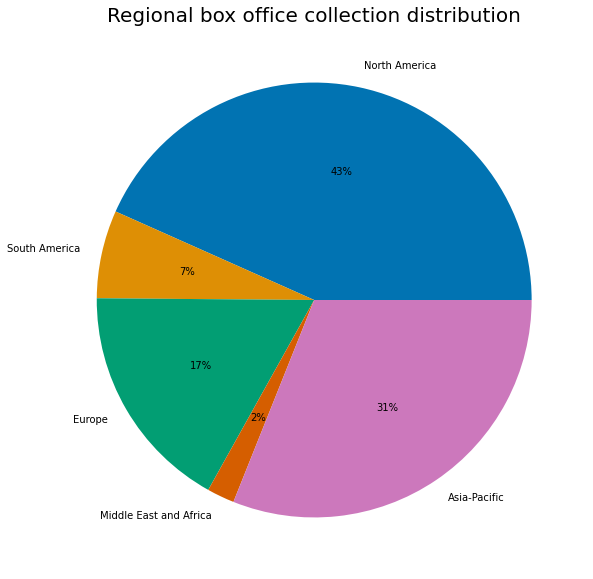

In [57]:
region_labels = ["North America", "South America", "Europe", "Middle East and Africa", "Asia-Pacific"]

palette_color = sns.color_palette('colorblind')

plt.subplots(figsize=(10,10))
graph_4 = plt.pie(regional_distribution, labels = region_labels, colors = palette_color, autopct='%.0f%%')
plt.title("Regional box office collection distribution", fontsize = 20)
plt.show()

### So, besides the domestic or North American region, the Asia-Pacific region is the biggest market for Marvel, covering 31% of the world wide box office collection.

### We can say that Marvel movies are famous in the Asia-Pacific region.

## THE END
## THANK YOU